# **[Excercise 1]** Value chain and conversion processes
In this notebook you are prompted to **understand the basics of data science** to examine *time series data* and aggregate it. Furthermore you are required to learn **basic financial mathematics** to evaluate the *profitability of financial assets*.

Furthermore we will cover the following Python basics:
- [x] Matplotlib
- [x] Pandas
- [x] Dictionaries
- [x] Classes

## ENTSOG
The role of the European Network of Transmission System Operators for Gas ([ENTSOG](https://www.entsog.eu/)) is to facilitate and enhance cooperation between national gas transmission system operators (TSOs) across Europe, to ensure the development of a pan-European transmission system in line with European Union energy and climate goals.

The interconnected gas network in Europe:

![ENTSOG map](./figures/ENTSOG_CAP_2021_A0_1189x841_FULL_066_FLAT-1.png "ENTSOG map")

If we narrow it down for Germany, we can see the entry points for Greifswald, a station that was used to import gas via the north stream pipeline from Russia.

![ENTSOG Germany map](./figures/ENTSOG_CAP_2021_A0_1189x841_FULL_066_FLAT-1_Germany.png "ENTSOG map: Focus Germany")

With the beginning of the Russian war in Ukraine, the European Union has committed themselves to import less gas from Russia. Hereby the gas imports from this pipeline must be replaced. Our work will be to examine new ways for a gas import.

## Task 1 : Data Science
The tasks of a Data Scientist include, for example, developing strategies for data analysis, preparing data for analysis, exploring, analysing and visually preparing data, building models with data using programming languages such as Python. For Energy System Analysis it is of greatest interest as there are large amounts of data that have to be dealt with.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Task 1.1 : Identify the gas import via the pipeline.

The data can be found via the following link: https://transparency.entsog.eu/#/map \
It is already downloaded in this directory and can be found in the folder `./data` \
Read in the data from the attached excel file `export_operationaldata_2023_03_08_140746.xlsx`. Check and examine the data.

In [2]:
import pandas as pd
data = pd.read_excel(io="./data/export_operationaldata_2023_03_08_140746.xlsx")
data

indicator periodType        periodFrom          periodTo  \
0     Physical Flow        day  2021-01-01 06:00  2021-01-02 06:00   
1     Physical Flow        day  2021-01-02 06:00  2021-01-03 06:00   
2     Physical Flow        day  2021-01-03 06:00  2021-01-04 06:00   
3     Physical Flow        day  2021-01-04 06:00  2021-01-05 06:00   
4     Physical Flow        day  2021-01-05 06:00  2021-01-06 06:00   
...             ...        ...               ...               ...   
1825  Physical Flow        day  2021-12-28 06:00  2021-12-29 06:00   
1826  Physical Flow        day  2021-12-29 06:00  2021-12-30 06:00   
1827  Physical Flow        day  2021-12-30 06:00  2021-12-31 06:00   
1828  Physical Flow        day  2021-12-31 06:00  2022-01-01 06:00   
1829  Physical Flow        day  2022-01-01 06:00  2022-01-02 06:00   

            tsoEicCode         operatorLabel         pointLabel  \
0     21X-DE-D-A0A0A-K  Gasunie Deutschland    Greifswald / GUD   
1     21X-DE-D-A0A0A-K  Gasunie Deutschland    Greifswald / GUD   
2     21X-DE-D-A0A0A-K  Gasunie Deutschland    Greifswald / GUD   
3     21X-DE-D-A0A0A-K  Gasunie Deutschland    Greifswald / GUD   
4     21X-DE-D-A0A0A-K  Gasunie Deutschland    Greifswald / GUD   
...                ...                   ...                ...   
1825  21X000000001309B                  LBTG  Greifswald / LBTG   
1826  21X000000001309B                  LBTG  Greifswald / LBTG   
1827  21X000000001309B                  LBTG  Greifswald / LBTG   
1828  21X000000001309B                  LBTG  Greifswald / LBTG   
1829  21X000000001309B                  LBTG  Greifswald / LBTG   

     tsoItemIdentifier directionKey   unit  ...  generalRemarks       value  \
0     21Z000000000255M        entry  kWh/d  ...             NaN  1151441931   
1     21Z000000000255M        entry  kWh/d  ...             NaN  1205939117   
2     21Z000000000255M        entry  kWh/d  ...             NaN  1213956982   
3     21Z000000000255M        entry  kWh/d  ...             NaN  1194102178   
4     21Z000000000255M        entry  kWh/d  ...             NaN  1180346596   
...                ...          ...    ...  ...             ...         ...   
1825  21Z000000000241X        entry  kWh/d  ...             NaN   773581601   
1826  21Z000000000241X        entry  kWh/d  ...             NaN   790596630   
1827  21Z000000000241X        entry  kWh/d  ...             NaN   793574659   
1828  21Z000000000241X        entry  kWh/d  ...             NaN   778994276   
1829  21Z000000000241X        entry  kWh/d  ...             NaN   673507724   

      lastUpdateDateTime isUnlimited  flowStatus isCamRelevant isNA  \
0       2021-02-21 10:51         NaN   Confirmed           yes  NaN   
1       2021-02-21 10:51         NaN   Confirmed           yes  NaN   
2       2021-02-21 10:51         NaN   Confirmed           yes  NaN   
3       2021-02-21 10:51         NaN   Confirmed           yes  NaN   
4       2021-02-21 10:51         NaN   Confirmed           yes  NaN   
...                  ...         ...         ...           ...  ...   
1825    2022-01-11 20:37         NaN   Confirmed           yes  NaN   
1826    2022-01-11 20:37         NaN   Confirmed           yes  NaN   
1827    2022-01-11 20:37         NaN   Confirmed           yes  NaN   
1828    2022-01-11 20:37         NaN   Confirmed           yes  NaN   
1829    2022-02-10 05:21         NaN   Confirmed           yes  NaN   

      isCmpRelevant interruptionCalculationRemark  isArchived  
0               yes                           NaN           0  
1               yes                           NaN           0  
2               yes                           NaN           0  
3               yes                           NaN           0  
4               yes                           NaN           0  
...             ...                           ...         ...  
1825            yes                           NaN           0  
1826            yes                           NaN 

Let us now explore the data. As we are dealing with time series data, it is best to plot it in a graph to get a first visual expression. This can be achieved using [matplotlib](https://matplotlib.org/) a library that provides visualizations in Python.

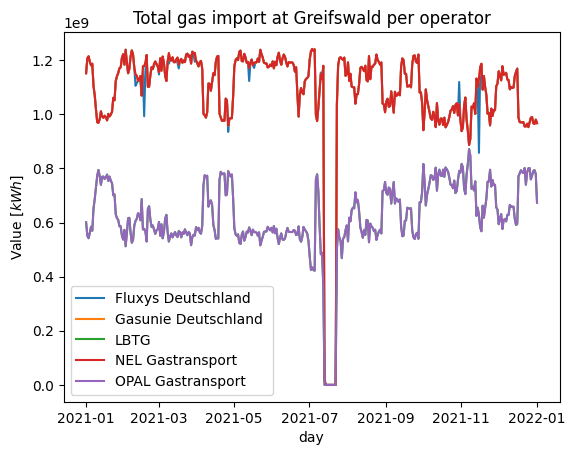

In [3]:
import matplotlib.pyplot as plt

# combine the time columns into a single datetime column
data["datetime"] = pd.to_datetime(data['periodFrom'])

# group by label and plot the values against the datetime column for each group
groups = data.groupby('operatorLabel')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group["datetime"], group['value'], label=name)
ax.set_xlabel('day')
ax.set_ylabel('Value [$kWh$]')
ax.legend()
ax.set_title("Total gas import at Greifswald per operator")
plt.show()

Despite we would expect to see a seasonal behaviour, as gas is used for heating in Germany, we cannot see such a clear trend. Maybe there is more to this, when we aggregate over all operators per month.

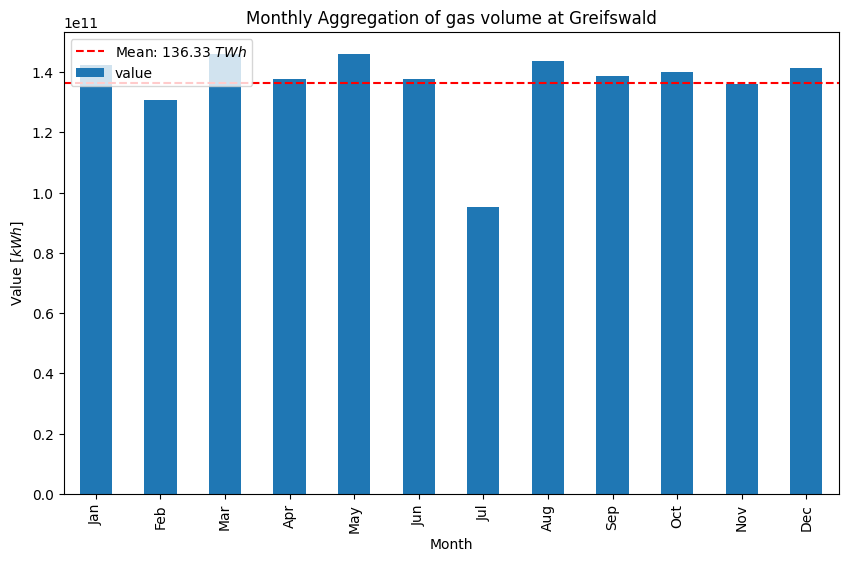

In [4]:
from matplotlib.dates import MonthLocator, DateFormatter

# aggregate data by month for each label
df_month = data.groupby(pd.Grouper(key='datetime', freq='M')).sum()
# remove the last month, as we are interested in all months related to 2021
df_month = df_month.drop(df_month.index[-1])

# plot as bar chart
ax = df_month['value'].plot(kind='bar', figsize=(10,6), legend=False)
ax.set_xlabel('Month')
ax.set_ylabel('Value [$kWh$]')
ax.set_title('Monthly Aggregation of gas volume at Greifswald')

# plot mean as horizontal line
mean_val = df_month['value'].mean()
mean_val_label = mean_val/1000/1000/1000
ax.axhline(y=mean_val, color='red', linestyle='--', label=f'Mean: {mean_val_label:.2f} $TWh$')
ax.legend()

# format x-axis labels to show only month names
ax.set_xticklabels(df_month.index.strftime('%b'))

plt.show()

In general, gas is used for industrial processes as well as space heating. Gas used for space heating is stored in geological storages for the long-term. It is cheaper from the market side and thereby not necessary to buy only for a selected period.

### Task 1.3
Identify the unit in which the gas amount is given. Calculate the gas import as the sum over all operator. Give the answer in TWh.

$$ \sum_{i \in \mathcal{O}, t \in T} x_{i,t} $$

In [5]:
all_operator = data["value"].sum()/1000/1000/1000
all_operator

1640.1594341240002

### Task 1.4
Calculate the share of import for the transmission system operator Fluxys.

$$ \text{share}_{Fluxys} = \frac{\sum_{t \in \mathcal{T}} x_{Fluxys,t}}{\sum_{i \in \mathcal{O}, t \in \mathcal{T}} x_{i,t}} * 100 $$

where $x_{i,t}$ represents the value of gas flow for operator $i$ at time step $t$ given a set of operators $\mathcal{O} \coloneqq \Set{\text{Fluxys}, \text{Gasunie}, \text{LBTG}, \text{NEL}, \text{OPAL}}$ and time steps $\mathcal{T}$.

In [6]:
fluxys = data.groupby("operatorLabel")["value"].sum()["Fluxys Deutschland"]/1000/1000/1000
all = data["value"].sum()/1000/1000/1000
share_fluxys = (fluxys / all) * 100
share_fluxys

24.11053684919407

### Task 1.5
The import for gas is associated with transmission and distribution losses that vary based on the temperature. Imagine we have calculated a loss function that describes the losses per day based on a seasonal profile. Recalculate the efficiency for the transmission of gas.

\begin{equation}
l_t = (\left(1- \eta_{comp} \right) + r_{leak} + \Delta p + \frac{\Delta T}{100}) \times \dot{m_t}, \qquad t = 1,2,\ldots,365
\end{equation}

where:
$$
    \eta_{comp}: \text{the efficiency of the compressor as a decimal value between 0 and 1} \\
    r_{leak}: \text{the rate of gas leakage from the substation, as a decimal value between 0 and 1} \\
    \Delta p: \text{the pressure drop across the substation components, as a decimal value between 0 and 1} \\
    \Delta T: \text{the temperature rise due to gas compression on the t-th day, in degrees Celsius} \\
    \dot{m_t}: \text{the flow rate of gas through the substation on the t-th day, in kWh/day} \\
    l_t: \text{the total losses in the substation on the t-th day, as a decimal value between 0 and 1} \\
$$

The loss function calculates the losses due to each factor separately, with the assumption of a linear relationship between each factor and losses. The total losses on each day are calculated as a weighted sum of the losses due to each factor, with the weightings determined by the flow rate of gas through the substation on that day. The temperature rise due to gas compression is included as a factor in the losses calculation for each day, rather than being averaged over the input data.

In [7]:
def calculate_losses(flow_rates, compressor_efficiency, leakage_rate, pressure_drop, temperature_rises):
    """
    Calculates the total losses in a gas substation based on several factors.
    
    Args:
        flow_rates (list[float]): The flow rates of gas through the substation, in kWh/day.
        compressor_efficiency (float): The efficiency of the compressor as a decimal value between 0 and 1.
        leakage_rate (float): The rate of gas leakage from the substation, as a decimal value between 0 and 1.
        pressure_drop (float): The pressure drop across the substation components, as a decimal value between 0 and 1.
        temperature_rises (list[float]): The temperature rises due to gas compression, in degrees Celsius.
        
    Returns:
        list[float]: The total losses per day as a list of decimal values between 0 and 1.
    """
    compressor_loss = 1 - compressor_efficiency
    leakage_loss = leakage_rate
    pressure_loss = pressure_drop
    
    temperature_losses = [temperature_rise / 100 for temperature_rise in temperature_rises]  # assume a linear relationship between temperature rise and losses
    
    total_losses = []
    for i, flow_rate in enumerate(flow_rates):
        temperature_loss = temperature_losses[i]
        total_loss = (compressor_loss + leakage_loss + pressure_loss + temperature_loss) * flow_rate
        total_losses.append(total_loss)
    
    return total_losses

We can retrieve the data for the temperature data via an API call using [Open-Meteo](https://open-meteo.com/) for the substation at Greifswald.

In [8]:
import requests
import json

# make a function to get the temperatures of a given location
def getTemperatures(locations, location, start_date, end_date):
    # get the lat and long of the location
    lat, lon = locations[location]
    req = requests.get(f"https://archive-api.open-meteo.com/v1/era5?latitude={lat}&longitude={lon}&start_date={start_date}&end_date={end_date}&hourly=temperature_2m" )
    req = json.loads(req.text)
    # get the tempratures
    temperatures = req['hourly']['temperature_2m']
    # get the times
    times = req['hourly']['time']
    return times, temperatures

# Define some Locations to choose from in Latitude and Longitude
locations = {
    'Greifswald': ['54.143879', '13.645449']
}

# Make a dictionary with the locations as keys and the getTemperatures() function as values
location2data = {}
for location in locations:
    location2data[location] = getTemperatures(locations, location, start_date = "2021-01-01", end_date = "2021-12-31")

Finally, we can start calculating the total losses. Assume a compressor efficiency of 98%, a leakage rate of 5% and a pressure drop of 2%. The flow rates are given from the column "value" in the dataframe. Furthermore the temperature data needs to be resampled from hourly data to a daily average.

In [9]:
substations = {}
substations["Greifswald"] = {
    "flow_rates" : data.groupby("periodFrom").sum()["value"].iloc[:-2].tolist(),
    "compressor_efficiency" : 0.98,
    "leakage_rate" : 0.05,
    "pressure_drop" : 0.02
}

In [10]:
hourly_temperatures = location2data["Greifswald"][1]
daily_temperatures = []
daily_total = 0
count = 0
for temperature in hourly_temperatures:
    daily_total += temperature
    count += 1
    if count == 24:
        daily_average = daily_total / 24
        daily_temperatures.append(daily_average)
        daily_total = 0
        count = 0

substations["Greifswald"]["temperature_rises"] = daily_temperatures

In [11]:
total_losses = calculate_losses(**substations["Greifswald"])
total_losses

[500769993.61204183,
 517983512.07600015,
 554472637.6640002,
 564752567.2800001,
 589146044.9867502,
 503276847.7931251,
 454890519.62141675,
 460047672.52125007,
 460671536.28383344,
 429893065.6810418,
 492749881.53533345,
 498753011.76883346,
 447496602.2332084,
 485053218.5225001,
 346693594.45808345,
 338571453.3318334,
 323291329.4656251,
 348025982.1196668,
 497456025.61716676,
 663227363.8367501,
 715852555.1790001,
 665657903.3450001,
 444908244.29666674,
 390898031.5895418,
 430409988.2700001,
 428851242.5785001,
 472183821.1380001,
 420664338.4020001,
 399522736.1498335,
 357777559.89733344,
 317926874.0141668,
 338604091.7222501,
 386208003.64650005,
 435128456.4426668,
 453348776.52900016,
 372583430.52133346,
 336696707.8866668,
 185345301.32020843,
 175722318.41175008,
 146471026.18283346,
 135432705.47500014,
 255460224.14583346,
 210806581.93316674,
 226661895.8892085,
 182766580.5770834,
 210087467.2132501,
 397127824.46933347,
 534048881.8853335,
 549542263.8387501,

Now it is your job to calculate the total losses for the system and determine the efficiency, save it to a variable called `efficiency`.

In [12]:
efficieny = 1 - sum(total_losses)/sum(substations["Greifswald"]["flow_rates"])
efficieny

0.816802991580036

---
The entry point "Greifswald" is no longer operating which makes it necessary for Germany to look for different options. 

Germany was offered two contracts from different suppliers that are able to cover the demand. Supplier A is situated at the entry point Karmoy in Norway and can be reached via an off-shore pipeline with a distance of 3,600 km. Supplier B is situated in the Netherlands and can be reached via an onshore pipeline with a distance of 500 km. The distance from Germany to supplier C is 10,600 km. Supplier C provides gas in liquid form only. The calorific value of LNG is typically higher. Table 1 contains information about the suppliers.

<center>

Supplier | Gas price $p$ [$\$$/$MMBTU$] | Calorific value $h$ [$kWh$/$m^3$]
--- | --- | ---
A | 3 | 10
B | 13 | 9.75
C | 3.45 | 11.5  

## Task 1.6

Calculate the required annual transport capacities $N_P$ and $N_{LNG}$ in billion ($10^9$) cubic meters of natural gas (BCM).

$$ N_m = \frac{\text{demand}}{\text{calorific value}} = \frac{\sum_{i \in \mathcal{O}, t \in T} x_{i,t}}{h_{m}} \quad \forall m \in \mathcal{M} $$

where $m$ is the carrier medium from the set of carriers $\mathcal{M} \coloneqq \Set{\text{Onshore Pipeline}, \text{LNG}}$.

In [13]:
supplier = {
    "A" : {
        "carrier_medium" : "offshore pipeline",
        "distance" : 3600,
        "gas_price" : 3,
        "calorific_value" : 10
    },
    "B" : {
        "carrier_medium" : "onshore pipeline",
        "distance" : 500,
        "gas_price" : 13,
        "calorific_value" : 9.75
    },
    "C" : {
        "carrier_medium" : "LNG",
        "distance" : 10600,
        "gas_price" : 3.45,
        "calorific_value" : 11.5
    },
}

N_offshore = data["value"].sum()/supplier["A"]["calorific_value"]*10e-9
N_onshore = data["value"].sum()/supplier["B"]["calorific_value"]*10e-9
N_lng = data["value"].sum()/supplier["C"]["calorific_value"]*10e-9

As both suppliers meet all necessary requirements, the decision is based on a cost anal-ysis. For this purpose, the investment and operational costs of both available options have to be calculated. The exact costs cannot be determined generically, because they may vary significantly from one region to another because of differences in terrain, cli-mate, labor costs, population density, degree of competition, etc. Indicative costs are therefore assumed in the cost analysis.

---
# Financial mathematics

### Pipelines (onshore)
The natural gas via pipeline value chain consists of transportation via pipeline and compressor stations to maintain the pressure.

**CAPEX** (pipe materials, installation and coating of the pipe, compressor stations, construction management, right-of-way clearance):

$$ CAPEX_{onshore} = \frac{\$ 96.333}{in \cdot km} \times \mu \times \delta_A + (\$ 3 \cdot 10^7 + \frac{\$ 4,145}{MW} \times c_{CS}) \times \alpha $$

**OPEX** (compressor station fuel, pipe repairs, environmental permits, administrative costs):

$$ OPEX_{onshore} = CAPEX_{onshore} \times \tau_p + (1-(1-\lambda)^\frac{\delta_A}{H}) \times N_p \times p_A \times \eta_A $$

#### Pipeline specification

<center>

Specification | Index | Unit | Value
--- | --- | --- | ---
Diameter | $\mu$ | [in] | 48
Distance to supplier A | $\delta_A$ | [km] | 2,600
Capacity of compressor stations | $c_{cs}$ | [MW] | 110
Number of compressor stations | $\alpha$ | [1] | <span style="color:red">**???**</span>
Operating cost factor | $\tau_p$ | [%] | 3.5
Self-consumption compressor station | $\lambda$ | [%] | 0.4
Distance between compressor stations | $H$ | [km] | 200
Annual transport capacity | $N_p$ | [$m^3_{Gas}$] | <span style="color:red">**???**</span>
Gas price supplier A | $p_A$ | [$/MMBTU] | <span style="color:red">**???**</span>
Pipeline efficiency | $\eta_p$ | [%] | 99

</center>


Working with dictionaries in Python is an efficient way of handling data, however with more information stored, tables are easier to read. For reading in the specifications, we will use [pandas](https://pandas.pydata.org/) Dataframe.

In [14]:
dict_pipeline = {
    "carrier_medium" : None,
    "diameter" : 48,
    "distance" : 2600,
    "capacity_comp" : 110,
    "number_comp" : None,
    "cost_op" : 3.5,
    "self_consumption" : 0.4,
    "distance_comp" : 200,
    "annual_transport_cap" : None,
    "gas_price_A" : None,
    "efficiency" : 0.99
}

dict_pipeline

{'carrier_medium': None,
 'diameter': 48,
 'distance': 2600,
 'capacity_comp': 110,
 'number_comp': None,
 'cost_op': 3.5,
 'self_consumption': 0.4,
 'distance_comp': 200,
 'annual_transport_cap': None,
 'gas_price_A': None,
 'efficiency': 0.99}

The number of compressor stations is given by $\alpha=\frac{\delta_A}{H}$. The conversion for British termal units is 1 MMBTU = 28.5 $m^3_{Gas}$.

In [15]:
dict_pipeline.update({
    "carrier_medium" : supplier["B"]["carrier_medium"],
    "number_comp" : dict_pipeline["capacity_comp"] / dict_pipeline["distance_comp"],
    "annual_transport_cap" : N_onshore * 28.5,
    "gas_price_A" : supplier["B"]["gas_price"]
})

dict_pipeline

{'carrier_medium': 'onshore pipeline',
 'diameter': 48,
 'distance': 2600,
 'capacity_comp': 110,
 'number_comp': 0.55,
 'cost_op': 3.5,
 'self_consumption': 0.4,
 'distance_comp': 200,
 'annual_transport_cap': 47943.121920547695,
 'gas_price_A': 13,
 'efficiency': 0.99}

Option 1: Creating a class with an object, then adding the function for CAPEX and OPEX.

In [16]:
class pipeline:
    def __init__(self, dict):
        self.carrier_medium = dict['carrier_medium']
        self.diameter = dict['diameter']
        self.distance = dict['distance']
        self.capacity_comp = dict['capacity_comp']
        self.number_comp = dict['number_comp']
        self.cost_op = dict['cost_op']
        self.self_consumption = dict['self_consumption']
        self.distance_comp = dict['distance_comp']
        self.annual_transport_cap = dict['annual_transport_cap']
        self.gas_price = dict['gas_price_A']
        self.efficiency = dict['efficiency']

onshore_pipeline = pipeline(dict_pipeline)

In [17]:
def CAPEX(self) -> float:
    
    pipe_material =  96333 * self.diameter * self.distance
    compressor_stations = (3*10e7 + 4125 * self.capacity_comp) * self.number_comp
    capex_pipeline = pipe_material + compressor_stations
    
    return capex_pipeline

pipeline.CAPEX = CAPEX

onshore_pipeline.CAPEX()

12187607962.5

In [18]:
def OPEX(self) -> float:
    
    operating_cost = self.CAPEX() * self.cost_op
    fuel_cost = (1-(1-self.self_consumption)**self.number_comp)*self.annual_transport_cap*self.gas_price*self.efficiency
    opex_pipeline = operating_cost + fuel_cost
    
    return opex_pipeline

pipeline.OPEX = OPEX

onshore_pipeline.OPEX()

42656779001.73378

Option 2: Creating a simple function executed on the dictionary.

In [19]:
def CAPEX(dict_pipeline) -> float:
    
    diameter = dict_pipeline["diameter"]
    distance = dict_pipeline["distance"]
    capacity_comp = dict_pipeline["capacity_comp"]
    number_comp = dict_pipeline["number_comp"]
    
    pipe_material =  96333 * diameter * distance
    compressor_stations = (3*10e7 + 4125 * capacity_comp) * number_comp
    capex_pipeline = pipe_material + compressor_stations
    
    return capex_pipeline

capex_pipeline = CAPEX(dict_pipeline)

In [20]:
def OPEX(dict_pipeline, capex_pipeline) -> float:
    
    cost_op = dict_pipeline["cost_op"]
    self_consumption = dict_pipeline["self_consumption"]
    number_comp = dict_pipeline["number_comp"]
    annual_transport_cap = dict_pipeline["annual_transport_cap"]
    gas_price = dict_pipeline["gas_price_A"]
    efficiency = dict_pipeline["efficiency"]
    
    operating_cost = capex_pipeline * cost_op
    fuel_cost = (1-(1-self_consumption)**number_comp)*annual_transport_cap*gas_price*efficiency
    opex_pipeline = operating_cost + fuel_cost
    
    return opex_pipeline

opex_pipeline = OPEX(dict_pipeline, capex_pipeline)

### LNG
The LNG value chain consists of natural gas cooling and liquefaction, transportation, and regasification at destination and possible interim storage.

<u> Liquefaction </u> \
CAPEX (liquefaction plant - pumps, compressors, heat exchanger, materials, installation, construction management, right-of-way-clearance):

$$ CAPEX_{\text{Liquefaction}} = (6.4 + 0.86 \times (C_{LNG} - 4 MTPA)) \cdot 10^9 \cdot \frac{\$}{MTPA} $$

<u> Regasification </u> \
CAPEX (regasification terminal - materials, installation, construction management, right-of-way-clearance)

$$ CAPEX_{\text{Regasification}} = 0.245 \times C_{LNG} \cdot 10^9 \cdot \frac{\$}{MTPA} $$

<u> Storage </u> \
CAPEX for storage are already included in  $CAPEX_{\text{Liquefaction} / \text{Regasification}}$. Their cost share accounts for approximately 30 %.
Losses during storage occur due to evaporation and leakage of gas. The average so-called Boiloff-Gas (BOG) rate accounts for 0.05-0.1 % per day, because the tank is constantly exposed to heat from the environment. These losses can be neglected. 

<u> Shipping </u> \
LNG carriers are usually chartered, which means no investment has to be made. 
Charter costs have to be considered in the operational costs with approximately $33,000 per day for carriers with typical capacities between 150,000-180,000 $m^3_{LNG}$. In addition, fuel costs must be taken into account. Regarding operational costs of the LNG transportation it has to be considered that during loading and unloading, charter fees are charged, but no fuel is consumed. Additionally, port and customs duties have to be paid, which are depending on the route.
It can be assumed that operational costs for the carrier amount to $\$80 \cdot 10^6$. 

<u> LNG </u>
Total costs derive from the sum of the individual components with $C_{LNG}$ being the project capacity in million tons per year:

$$ CAPEX_{LNG} = CAPEX_{\text{Liquefaction}} + CAPEX_{\text{Regasification}} $$

$$ OPEX_{LNG} = CAPEX_{\text{Liquefaction}} \times \tau_{LNG} + CAPEX_{\text{Regasification}} \times \sigma + OPEX_{\text{carrier}} + N_{LNG} \times p_B \times \omega $$

with $$ \omega = \Phi + \Omega + (1-(1-\xi)^\frac{\delta_B}{\nu \cdot 24h}) $$

and $$ C_{LNG} = \frac{N_{LNG}}{1,342 \cdot 10^6 \cdot \frac{m^3_{Gas}}{MTPA}} $$

#### LNG specification

<center>

Specification | Index | Unit | Value
--- | --- | --- | ---
Project capacity | $C_{LNG}$ | [MTPA] | <span style="color:red">**???**</span>
Annual transport capacity | $N_{LNG}$ | [$m^3_{LNG}$] | <span style="color:red">**???**</span>
Distance to supplier C | $\delta_B$ | [km] | <span style="color:red">**???**</span>
Velocity of carrier | $\nu$ | [km/h] | 36
Efficiency liquefaction | $\Phi$ | [%] | 9.5
BOG rate regasification | $\xi$ | [%] | 0.15
BOG rate carrier | $\xi$ | [%] | 0.11
Operating cost factor liquefaction | $\tau_{LNG}$ | [%] | 3.5
Operating cost factor regasification | $\sigma$ | [%] | 2.5
Gas self-consumption | $\omega$ | [%] | <span style="color:red">**???**</span>
Gas price supplier C | $p_B$ | [$/MMBTU] | <span style="color:red">**???**</span>

</center>

In [21]:
dict_lng = {
    "carrier_medium" : None,
    "project_capacity" : None,
    "annual_transport_cap" : None,
    "distance" : None,
    "velocity" : 3.6,
    "efficieny_liquefaction" : 9.5,
    "BOG_rate_regasification" : 0.15,
    "BOG_rate_carrier" : 0.11,
    "operating_cost_liquefaction" : 3.5,
    "operating_cost_regasification" : 2.5,
    "gas_self_consumption" : None,
    "gas_price_C" : None
}

dict_lng

{'carrier_medium': None,
 'project_capacity': None,
 'annual_transport_cap': None,
 'distance': None,
 'velocity': 3.6,
 'efficieny_liquefaction': 9.5,
 'BOG_rate_regasification': 0.15,
 'BOG_rate_carrier': 0.11,
 'operating_cost_liquefaction': 3.5,
 'operating_cost_regasification': 2.5,
 'gas_self_consumption': None,
 'gas_price_C': None}

In [22]:
dict_lng.update({
    "carrier_medium" : supplier["C"]["carrier_medium"],
    "project_capacity" : dict_pipeline["capacity_comp"] / dict_pipeline["distance_comp"],
    "annual_transport_cap" : N_lng * 10e9,
    "distance" : supplier["C"]["distance"],
    "gas_self_consumption" : dict_lng["efficieny_liquefaction"] + dict_lng["BOG_rate_regasification"] + (1- (1-dict_lng["BOG_rate_carrier"])**( (supplier["C"]["distance"])/(dict_lng["velocity"]*24) ) ),
    "gas_price_C" : supplier["C"]["gas_price"]
})

dict_lng

{'carrier_medium': 'LNG',
 'project_capacity': 0.55,
 'annual_transport_cap': 14262255948904.35,
 'distance': 10600,
 'velocity': 3.6,
 'efficieny_liquefaction': 9.5,
 'BOG_rate_regasification': 0.15,
 'BOG_rate_carrier': 0.11,
 'operating_cost_liquefaction': 3.5,
 'operating_cost_regasification': 2.5,
 'gas_self_consumption': 10.649999382120775,
 'gas_price_C': 3.45}

## Task 1.6

To compare two investment decisions, the net present value method is commonly used. Both the pipeline and LNG infrastructure have a 20-year life time. The internal rate of return is the discount rate that could be earned in alternative investments. For this comparison, it is assumed to be 5 %.

The net present value is defined as 

$$ NPV = \sum_{t=0}^{T} \frac{\text{cash flow}_t}{(1+i)^t} = I_0 + \sum_{t=1}^{T} \frac{\text{cash flow}_t}{(1+i)^t}$$
Write the function for the net present value, assuming equal payments in each period.

Bonus task: How would you write the function assuming different payments for each period?

In [23]:
def net_present_value(cash_flow, T: int, interest_rate: float):
    
    if isinstance(cash_flow, list):
        return sum(cash_flow[t]/(1+interest_rate)**t for t in range(T))
    else:
        return sum(cash_flow/(1+interest_rate)**t for t in range(T))

Calculate the net present value for equal payments of 10 units, a lifetime of 35 years and at an interest rate of 5%.

In [24]:
net_present_value(10, 35, 0.05)

171.92904007595865

Calculate the net present value for unequal payments, generate a list of 35 random numbers between -10 and 100 and compute the net_present_value. \
Hint: Use the internal python package random.

In [25]:
import random
random.seed(30)

cash_flow = random.sample(range(-10, 100), 35) #Sample from a list with number between -10 and 100, 35 random numbers
net_present_value(cash_flow, 35, 0.05)

729.1203690336886

If cash flows are equal for t = 1,…,T, the present value factor can be used:
    
$$ PVF = \frac{(1+i)^T-1}{(1+i)^T \cdot i} $$

$$ NPV = I_0 + \text{cash flow}_1 \cdot PVF $$

## Task 1.7
Select an option using the net present value method.

In [26]:
def present_value_factor(T: int, interest_rate: float):
    return ((1+interest_rate)**T - 1) / ((1+interest_rate)**T * interest_rate)

In [27]:
# Option 1
npv_pipeline_option1 = onshore_pipeline.CAPEX() + onshore_pipeline.OPEX() * present_value_factor(20, 0.05)
# Option 2
npv_pipeline_option2 = capex_pipeline + opex_pipeline * present_value_factor(20, 0.05)

assert npv_pipeline_option1 == npv_pipeline_option2